# Personality Classification

In [1]:
import pandas as pd
import plotnine as p9
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import StackingClassifier

from xgboost import XGBClassifier

from ydata_profiling import ProfileReport
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report

from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score

from sklearn.model_selection import GridSearchCV


In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("rakeshkapilavai/extrovert-vs-introvert-behavior-data")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/extrovert-vs-introvert-behavior-data


In [3]:
df_personality = pd.read_csv('/kaggle/input/extrovert-vs-introvert-behavior-data/personality_dataset.csv')

## EDA

In [4]:
df_personality.head(10)

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater


,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,4.0,No,4.0,6.0,No,13.0,5.0,Extrovert
1,9.0,Yes,0.0,0.0,Yes,0.0,3.0,Introvert
2,9.0,Yes,1.0,2.0,Yes,5.0,2.0,Introvert
3,0.0,No,6.0,7.0,No,14.0,8.0,Extrovert
4,3.0,No,9.0,4.0,No,8.0,5.0,Extrovert
5,1.0,No,7.0,5.0,No,6.0,6.0,Extrovert
6,4.0,No,9.0,NaN,No,7.0,7.0,Extrovert
7,2.0,No,8.0,4.0,No,7.0,8.0,Extrovert
8,10.0,Yes,1.0,3.0,Yes,0.0,3.0,Introvert
9,0.0,No,8.0,6.0,No,13.0,8.0,Extrovert


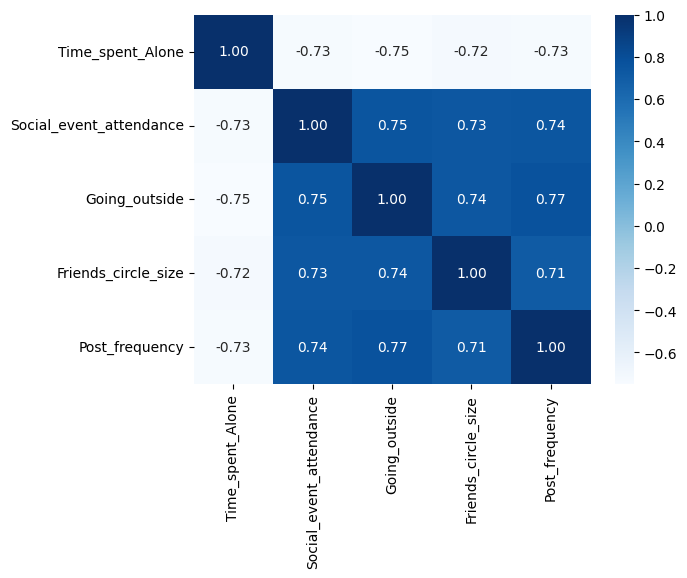

In [5]:
sns.heatmap(df_personality[['Time_spent_Alone', 'Social_event_attendance', 'Going_outside', 'Friends_circle_size', 'Post_frequency']].corr(), fmt='.2f', annot=True, cmap='Blues')
plt.show()

In [6]:
print(f'Duplicates: {df_personality.duplicated().sum()}')

Duplicates: 388


In [7]:
df_personality.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2900 entries, 0 to 2899
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Time_spent_Alone           2837 non-null   float64
 1   Stage_fear                 2827 non-null   object 
 2   Social_event_attendance    2838 non-null   float64
 3   Going_outside              2834 non-null   float64
 4   Drained_after_socializing  2848 non-null   object 
 5   Friends_circle_size        2823 non-null   float64
 6   Post_frequency             2835 non-null   float64
 7   Personality                2900 non-null   object 
dtypes: float64(5), object(3)
memory usage: 181.4+ KB


In [8]:
print(f'Rows: {df_personality.shape[0]}')
print(f'Columns: {df_personality.shape[1]}')

Rows: 2900
Columns: 8


In [9]:
df_personality[df_personality.isna().any(axis=1)]

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater


,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
6,4.0,No,9.0,NaN,No,7.0,7.0,Extrovert
33,8.0,Yes,3.0,3.0,NaN,2.0,0.0,Introvert
41,1.0,No,4.0,5.0,No,NaN,10.0,Extrovert
59,NaN,No,9.0,4.0,No,7.0,5.0,Extrovert
71,1.0,No,NaN,5.0,No,11.0,8.0,Extrovert
...,...,...,...,...,...,...,...,...
2882,1.0,NaN,9.0,3.0,No,7.0,6.0,Extrovert
2885,10.0,Yes,0.0,0.0,NaN,2.0,0.0,Introvert
2893,9.0,NaN,2.0,0.0,Yes,4.0,2.0,Introvert
2894,0.0,No,9.0,3.0,No,12.0,NaN,Extrovert


In [10]:
print(f'Total NaN per column: \n{df_personality.isna().sum()}')

Total NaN per column: 
Time_spent_Alone             63
Stage_fear                   73
Social_event_attendance      62
Going_outside                66
Drained_after_socializing    52
Friends_circle_size          77
Post_frequency               65
Personality                   0
dtype: int64


## Data Preprocessing

In [11]:
# Encode the Personality column

In [12]:
label_e = LabelEncoder()
df_personality['Personality'] = label_e.fit_transform(df_personality['Personality'])

In [13]:
# We will not remove duplicates since this dataset seems to be a survey, it could explain the duplicates so we won't remove them.
# I will use SimpleImputer to fill the NaN values
# First I need to separate the numerical columns from the categorical columns

In [14]:
personality_num = ['Time_spent_Alone', 'Social_event_attendance', 'Going_outside', 'Friends_circle_size', 'Post_frequency']
personality_cat = ['Stage_fear', 'Drained_after_socializing']

In [15]:
# For the numerical values I will use the mean, and for the categorical values, I will use the mode

In [16]:
num_imp = SimpleImputer(strategy='mean')
cat_imp = SimpleImputer(strategy='most_frequent')

In [17]:
df_personality[personality_num] = num_imp.fit_transform(df_personality[personality_num])
df_personality[personality_cat] = cat_imp.fit_transform(df_personality[personality_cat])

In [18]:
# Then I encode the categorical features
ohe = OneHotEncoder(drop='first')
cat_transformed = ohe.fit_transform(df_personality[personality_cat]).toarray()
df_cat_transformed = pd.DataFrame(cat_transformed, columns=ohe.get_feature_names_out())

In [19]:
# Concatenate this df to our original df

In [20]:
df_personality_final = pd.concat([df_personality.drop(columns=personality_cat), df_cat_transformed], axis=1)
df_personality_final

,Time_spent_Alone,Social_event_attendance,Going_outside,Friends_circle_size,Post_frequency,Personality,Stage_fear_Yes,Drained_after_socializing_Yes
0,4.0,4.0,6.0,13.0,5.0,0,0.0,0.0
1,9.0,0.0,0.0,0.0,3.0,1,1.0,1.0
2,9.0,1.0,2.0,5.0,2.0,1,1.0,1.0
3,0.0,6.0,7.0,14.0,8.0,0,0.0,0.0
4,3.0,9.0,4.0,8.0,5.0,0,0.0,0.0
...,...,...,...,...,...,...,...,...
2895,3.0,7.0,6.0,6.0,6.0,0,0.0,0.0
2896,3.0,8.0,3.0,14.0,9.0,0,0.0,0.0
2897,4.0,1.0,1.0,4.0,0.0,1,1.0,1.0
2898,11.0,1.0,3.0,2.0,0.0,1,1.0,1.0


In [21]:
# Train/Test split

In [22]:
X = df_personality_final.drop(columns=['Personality'])
y = df_personality_final['Personality']

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, stratify=y)

In [24]:
# Scaling Features

In [25]:
scaler = StandardScaler()

In [26]:
scaler.fit(X_train)

StandardScaler()

In [27]:
X_train_scaled = scaler.transform(X_train)

In [28]:
X_test_scaled = scaler.transform(X_test)

## Modeling

In [29]:
models = {'log':{
            'model': LogisticRegression(),
            'scaled': True,
            'params': {'C': [0.001, 0.003, 0.01, 0.03], 'solver': ['lbfgs', 'liblinear']}
         },
          'knn':{
            'model': KNeighborsClassifier(),
            'scaled': True,
            'params': {'n_neighbors': [3, 5, 7], 'weights': ['uniform', 'distance']} 
         },
          'svm':{
            'model': SVC(),
            'scaled': True,
            'params': {'C': [0.001, 0.003, 0.01, 0.03], 'kernel': ['rbf', 'linear'], 'gamma': ['scale', 'auto', 0.1, 1]}
         },        
          'dt':{
            'model': DecisionTreeClassifier(),
            'scaled': False,
            'params': {'max_depth': [5, 10], 'min_samples_split': [2, 5, 10]}
         },
          'rf':{
            'model': RandomForestClassifier(),
            'scaled': False,
            'params': {'n_estimators': [100, 150], 'max_depth': [5, 10], 'min_samples_split': [2, 5]}
         },
          
          'xgb':{
            'model': XGBClassifier(),
            'scaled': False,
            'params': {'n_estimators': [100, 150], 'learning_rate': [0.03, 0.1], 'max_depth': [3, 5]}
         }
}

In [30]:
# Finding the best hyperparameters for various models.

In [31]:
final_models = []
for name, details in models.items():
    gscv = GridSearchCV(
        details['model'], 
        details['params'],
        cv=3,
        scoring='f1_weighted',
        n_jobs=-1
    )
    X_train_final = X_train_scaled
    if details['scaled'] == True:
        X_train_final = X_train_scaled
        X_test_final = X_test_scaled
    else:
        X_train_final = X_train
        X_test_final = X_test
    gscv.fit(X_train_final, y_train)

    final_models.append({
    'model': name,
    'best_score': gscv.best_score_,
    'best_params': gscv.best_params_})


In [32]:
final_models_df = pd.DataFrame(final_models)
print(final_models_df)

  model  best_score                                        best_params
0   log    0.930554                    {'C': 0.001, 'solver': 'lbfgs'}
1   knn    0.928583           {'n_neighbors': 7, 'weights': 'uniform'}
2   svm    0.930554    {'C': 0.003, 'gamma': 'scale', 'kernel': 'rbf'}
3    dt    0.929571           {'max_depth': 5, 'min_samples_split': 5}
4    rf    0.930554  {'max_depth': 5, 'min_samples_split': 2, 'n_es...
5   xgb    0.930061  {'learning_rate': 0.03, 'max_depth': 3, 'n_est...


In [33]:
# Stacking ensemble

In [34]:
estimators = [
    ('rf', RandomForestClassifier(**final_models_df.loc[final_models_df['model'] == 'rf']['best_params'].iloc[0])),
    ('xgb', XGBClassifier(**final_models_df.loc[final_models_df['model'] == 'xgb']['best_params'].iloc[0])),
    ('svm', SVC(**final_models_df.loc[final_models_df['model'] == 'svm']['best_params'].iloc[0]))]

In [35]:
final_model = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression(max_iter=1000), n_jobs=-1)

In [36]:
final_model.fit(X_train_scaled, y_train)

StackingClassifier(estimators=[('rf', RandomForestClassifier(max_depth=5)),
                               ('xgb',
                                XGBClassifier(base_score=None, booster=None,
                                              callbacks=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=None,
                                              device=None,
                                              early_stopping_rounds=None,
                                              enable_categorical=False,
                                              eval_metric=None,
                                              feature_types=None, gamma=None,
                                              grow_policy=None,
                                              importance_type=...
                                              learning_rate=0.03, max_bin=None,
                                              max_cat_threshold=None,
                                              max_cat_to_onehot=None,
                                              max_delta_step=None, max_depth=3,
                                              max_leaves=None,
                                              min_child_weight=None,
                                              missing=nan,
                                              monotone_constraints=None,
                                              multi_strategy=None,
                                              n_estimators=100, n_jobs=None,
                                              num_parallel_tree=None,
                                              random_state=None, ...)),
                               ('svm', SVC(C=0.003))],
                   final_estimator=LogisticRegression(max_iter=1000),
                   n_jobs=-1)

In [37]:
y_train_predicted = final_model.predict(X_train_scaled)

In [38]:
y_test_predicted = final_model.predict(X_test_scaled)

In [39]:
# Accuracy and F1 score for the train

In [40]:
accuracy_score(y_train_predicted, y_train)

0.9305418719211823

In [41]:
f1_score(y_train_predicted, y_train)

0.9293233082706768

In [42]:
# Accuracy and F1 score for the test 

In [43]:
accuracy_score(y_test_predicted, y_test)

0.9436781609195403

In [44]:
accuracy_score(y_test_predicted, y_test)

0.9436781609195403

In [45]:
print(classification_report(y_test, y_test_predicted))

              precision    recall  f1-score   support

           0       0.95      0.94      0.94       447
           1       0.93      0.95      0.94       423

    accuracy                           0.94       870
   macro avg       0.94      0.94      0.94       870
weighted avg       0.94      0.94      0.94       870



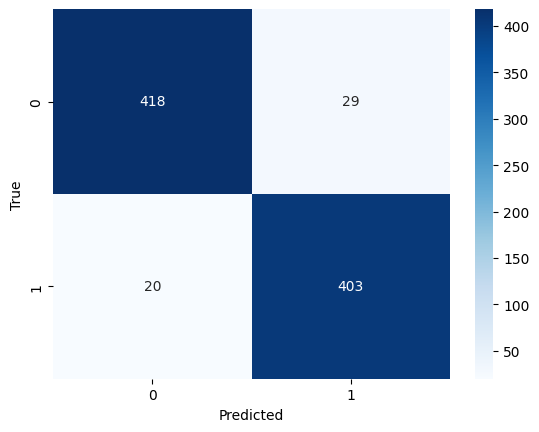

In [46]:
# Confusion Matrix for the test 

sns.heatmap(confusion_matrix(y_test, y_test_predicted), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [47]:
# I also want to check the Feature Importance so I will run a Random Forest using the best params from before. 

In [48]:
rf_params = final_models_df.loc[final_models_df['model'] == 'rf']['best_params'].iloc[0]

In [49]:
rf_model = RandomForestClassifier(**rf_params)

In [50]:
rf_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=5)

In [51]:
feature_importance = pd.DataFrame({'Feature': X_train.columns, 'Importance': rf_model.feature_importances_})

In [52]:
feature_importance.sort_values(by='Importance', ascending=False, inplace=True)

In [53]:
print(feature_importance)

                         Feature  Importance
5                 Stage_fear_Yes    0.258470
6  Drained_after_socializing_Yes    0.217600
0               Time_spent_Alone    0.170772
2                  Going_outside    0.122345
1        Social_event_attendance    0.121832
4                 Post_frequency    0.096816
3            Friends_circle_size    0.012164


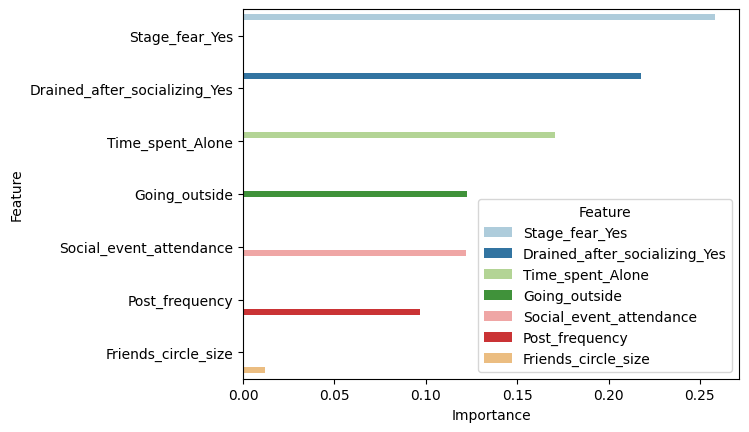

In [54]:
sns.barplot(data=feature_importance, x='Importance', y='Feature', hue="Feature", palette='Paired')
plt.show()

## Conclusions:

Drained_after_socializing_Yes, Stage_fear_Yes, and Social_event_attendance are the most important features, indicating that emotional and behavioral responses to social situations are strong predictors.

The model demonstrates excellent performance, achieving a test accuracy of 94.7% and an F1-score of 0.95.

Only 26 false positives and 20 false negatives out of 870 predictions, a small misclassification rate.